# Тестовое задание (аналитик данных)

Есть три csv файла с данными. Загружаем их и с помощью pandas анализируем:


In [1]:
import pandas as pd

In [23]:
orders_path = 'orders.csv'
plan_path = 'plan.csv'
payments_path = 'payments.csv'


In [24]:
orders_df = pd.read_csv(orders_path)
plan_df = pd.read_csv(plan_path)
payments_df = pd.read_csv(payments_path)

In [5]:
orders_df.info() http://localhost:8888/lab/tree/delays_analysis.ipynb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55748 entries, 0 to 55747
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    55748 non-null  int64  
 1   created_at  55748 non-null  object 
 2   put_at      55748 non-null  object 
 3   closed_at   46472 non-null  object 
 4   issued_sum  55748 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ MB


orders.csv (55 748 записей):
- Содержит информацию о заявках: дата создания, выдачи, закрытия, сумма.
- closed_at имеет пропуски (9276).


In [27]:
plan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420282 entries, 0 to 420281
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   order_id        420282 non-null  int64         
 1   plan_at         420282 non-null  datetime64[ns]
 2   plan_sum_total  420282 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 9.6 MB


plan.csv (420 282 записей):
- График плановых платежей: дата платежа и необходимая сумма.
- Все значения заполнены.


In [7]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143284 entries, 0 to 143283
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   order_id  143284 non-null  int64  
 1   paid_at   143284 non-null  object 
 2   paid_sum  143284 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.3+ MB


payments.csv (143 284 записей):

- Фактические платежи: дата и сумма.
- Все данные заполнены.
- Есть 5 дубликатов


In [9]:
orders_df.head(), plan_df.head(), payments_df.head()

(    order_id               created_at                   put_at  \
 0  400001732  2022-06-02 00:00:23.997  2022-06-02 20:18:00.180   
 1  400005838  2022-06-02 00:10:22.997  2022-06-02 15:41:33.267   
 2  400007915  2022-06-02 00:18:04.000  2022-06-05 19:17:38.547   
 3  400008952  2022-06-02 00:22:07.000  2022-06-03 14:25:18.033   
 4  400009027  2022-06-02 00:25:39.000  2022-06-02 00:40:40.320   
 
                  closed_at  issued_sum  
 0  2022-10-17 11:52:22.190     13600.0  
 1  2022-06-02 17:38:43.917     20000.0  
 2  2022-06-21 21:55:51.877      5820.0  
 3  2022-07-12 10:47:46.307      9000.0  
 4  2022-06-22 14:15:07.423      5000.0  ,
     order_id     plan_at  plan_sum_total
 0  400001732  2022-06-02          5600.0
 1  400001732  2022-07-02          9450.0
 2  400001732  2022-08-01         12170.0
 3  400001732  2022-08-31         14890.0
 4  400001732  2022-09-30         17610.0,
     order_id                  paid_at  paid_sum
 0  400013633  2022-06-02 00:48:13.800   

In [26]:
orders_df['created_at'] = pd.to_datetime(orders_df['created_at'])
orders_df['put_at'] = pd.to_datetime(orders_df['put_at'])
orders_df['closed_at'] = pd.to_datetime(orders_df['closed_at'])
plan_df['plan_at'] = pd.to_datetime(plan_df['plan_at'])
payments_df['paid_at'] = pd.to_datetime(payments_df['paid_at'])

Переведем дату и время из строкового типа в datetime

In [31]:
print('Дубликатов в 1:', orders_df.duplicated().sum(), 'Дубликатов в 2:', plan_df.duplicated().sum(), 'Дубликатов в 3:', payments_df.duplicated().sum())

Дубликатов в 1: 0 Дубликатов в 2: 0 Дубликатов в 3: 0


В payments есть дубликаты. Они возможны при ошибке в выгрузки данных. Удалим их.

In [29]:
dubl_rows = payments_df[payments_df.duplicated(keep=False)]
print(dubl_rows)

         order_id                 paid_at  paid_sum
11474   411504997 2022-06-24 17:14:56.997   10100.0
11475   411504997 2022-06-24 17:14:56.997   10100.0
12469   422632789 2022-06-25 23:16:16.000    8080.0
12470   422632789 2022-06-25 23:16:16.000    8080.0
37758   432761640 2022-07-21 12:38:12.000     150.0
37759   432761640 2022-07-21 12:38:12.000     150.0
38413   420036980 2022-07-21 20:08:58.997    4800.0
38414   420036980 2022-07-21 20:08:58.997    4800.0
139589  456075017 2022-11-22 19:44:08.793    2720.0
139590  456075017 2022-11-22 19:44:08.793    2720.0


In [30]:
payments_df = payments_df.drop_duplicates()

Будем считать процент количества просрочек к плановому числу выплат в каждом месяце
Так как данные актуальны на 08.12.2022 будем учитывать плановые выплаты до этого числа


In [33]:
plan_df = plan_df[plan_df['plan_at'] <= '2022-12-08']

In [36]:
plan_df.head()

,order_id,plan_at,plan_sum_total,month
0,400001732,2022-06-02,5600.0,2022-06
1,400001732,2022-07-02,9450.0,2022-07
2,400001732,2022-08-01,12170.0,2022-08
3,400001732,2022-08-31,14890.0,2022-08
4,400001732,2022-09-30,17610.0,2022-09


In [35]:
plan_df['month'] = plan_df['plan_at'].dt.to_period('M')


C:\Users\denis\AppData\Local\Temp\ipykernel_6356\2273343486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plan_df['month'] = plan_df['plan_at'].dt.to_period('M')


In [48]:
delays_by_month = {}


for index, row in plan_df.iterrows():
    order_id = row['order_id']
    plan_date = row['plan_at']
    plan_amount = row['plan_sum_total']
    month = row['month']

    if month not in delays_by_month:
        delays_by_month[month] = [0,0]
        
    paid_amount = payments_df[
        (payments_df['order_id'] == order_id) & (payments_df['paid_at'] <= plan_date)
    ]['paid_sum'].sum()

   
    if paid_amount < plan_amount:
        delays_by_month[month][0] += 1

    delays_by_month[month][1] += 1




In [52]:
print(delays_by_month.items)

<built-in method items of dict object at 0x00000250A1A5A2C0>


In [54]:
delays_percentage_by_month = {
    month: (delays[0] / delays[1]) * 100  
    for month, delays in delays_by_month.items()
}


delays_df = pd.DataFrame(list(delays_percentage_by_month.items()), columns= ['month', 'delayed_persentage'])
delays_df = delays_df.sort_values('month')
print(delays_df)

     month  delayed_persentage
0  2022-06           91.156841
1  2022-07           76.013712
2  2022-08           63.227991
3  2022-09           43.535733
4  2022-10           28.663564
5  2022-11           23.386951
6  2022-12           21.256803


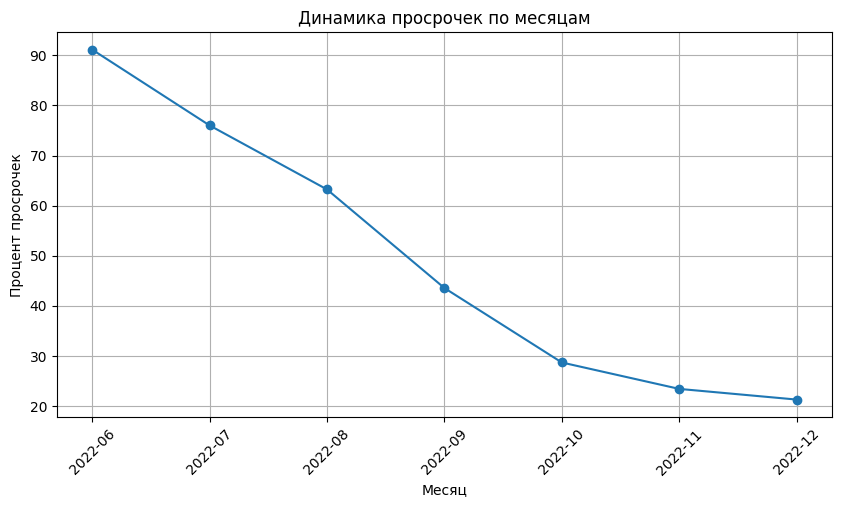

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(delays_df['month'].astype(str), delays_df['delayed_persentage'], marker = 'o', linestyle='-')
plt.xlabel('Месяц')
plt.ylabel('Процент просрочек')
plt.title("Динамика просрочек по месяцам")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Наблюдается снижение процента просрочек